# Feature Engineering and Modeling
----

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv(r"C:\Users\Kathleen\Desktop\ML1\data.csv")

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1         0         54946                0  2013-06-15  2016-06-15   
2         0         54946                0  2013-06-15  2016-06-15   
3         0         54946                0  2013-06-15  2016-06-15   
4         0         54946                0  2013-06-15  2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-11-01                0.0                   0   
1      2015-11-01   2015-11-01                0.0                   0   
2      2015-11-01   2015-11-01                0.0                   0   
3      2015-11-01   2015-11-01                0.0                   0   
4      2015-11-01   2015-11-01                0.0                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                     1.78   
2                       0.0                     1.78   
3                       0.0                     1.78   
4                       0.0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  
0       24.339581           16.226389      1096          False          True  
1       24.339581           16.226389      1096          False          True  
2       24.339578        

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [48]:
data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                             int64
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

### Feature Engineering

##### Convert to correct dtypes

In [49]:
data['date_activ'] = pd.to_datetime(data['date_activ'])
data['date_end'] = pd.to_datetime(data['date_end'])
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'])
data['date_renewal'] = pd.to_datetime(data['date_renewal'])

In [50]:
data.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                    int64
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

##### Encoding categorical features

In [51]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [52]:
le = LabelEncoder()

data['high_contract'] = le.fit_transform(data['high_contract'])
data['low_contract'] = le.fit_transform(data['low_contract'])


In [53]:

data['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: count, dtype: int64

We have 8 categories, so we will create 8 variables from this column using one hot encoding. However,the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not be as significant to the model at all.For this reason, we will drop these 3 dummy variables.

In [54]:
from sklearn.preprocessing import OneHotEncoder

def column_names(feature,category):
    return str(feature)+'_'+str(category)

ohe=OneHotEncoder(feature_name_combiner=column_names)

ohe_values = ohe.fit_transform(data[['channel_sales']]).toarray()
columns = ohe.get_feature_names_out()

channel = pd.DataFrame(ohe_values,columns=columns)
data=pd.concat([data,channel],axis=1).drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
                                      'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
                                      'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa'])

In [55]:
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   
3         0         54946                0 2013-06-15 2016-06-15   
4         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-11-01                0.0                   0   
1      2015-11-01   2015-11-01                0.0                   0   
2      2015-11-01   2015-11-01                0.0                   0   
3      2015-11-01   2015-11-01                0.0                   0   
4      2015-11-01   2015-11-01                0.0                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                     1.78   
2                       0.0                     1.78   
3                       0.0                     1.78   
4                       0.0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  \
0       24.339581           16.226389      1096              0             1   
1       24.339581           16.226389      1096              0             1   
2       24.339578           16.226

In [56]:
data['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: count, dtype: int64

Similar to channel_sales , the last 3 categories in the output above show very low frequency, so we will remove these from the features after one hot encoding.

In [57]:
def column_names(feature,category):
    return str(feature)+'_'+str(category)

ohe=OneHotEncoder(feature_name_combiner=column_names)

ohe_values = ohe.fit_transform(data[['origin_up']]).toarray()
columns = ohe.get_feature_names_out()

origin = pd.DataFrame(ohe_values,columns=columns)
data=pd.concat([data,origin],axis=1).drop(columns=['origin_up_MISSING', 
                                                   'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
                                                     'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

In [58]:
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1         0         54946                0 2013-06-15 2016-06-15   
2         0         54946                0 2013-06-15 2016-06-15   
3         0         54946                0 2013-06-15 2016-06-15   
4         0         54946                0 2013-06-15 2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-11-01                0.0                   0   
1      2015-11-01   2015-11-01                0.0                   0   
2      2015-11-01   2015-11-01                0.0                   0   
3      2015-11-01   2015-11-01                0.0                   0   
4      2015-11-01   2015-11-01                0.0                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                     1.78   
2                       0.0                     1.78   
3                       0.0                     1.78   
4                       0.0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  \
0       24.339581           16.226389      1096              0             1   
1       24.339581           16.226389      1096              0             1   
2       24.339578           16.226

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [59]:

def convert_months(reference_date, df, column):
    
    # Ensure the column is in datetime format
    df[column] = pd.to_datetime(df[column])
    
    # Calculate the difference in years and months separately
    years_diff = reference_date.year - df[column].dt.year
    months_diff = reference_date.month - df[column].dt.month
    
    # Total difference in months
    total_months = (years_diff * 12) + months_diff
    
    return total_months

In [60]:
reference_date = datetime(2016, 1, 1)

# Create columns
data['months_activ'] = convert_months(reference_date, data, 'date_activ')
data['months_to_end'] = -convert_months(reference_date, data, 'date_end')
data['months_modif_prod'] = convert_months(reference_date, data, 'date_modif_prod')
data['months_renewal'] = convert_months(reference_date, data, 'date_renewal')

In [61]:
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

data = data.drop(columns=remove)
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0                0.0   
1         0         54946                0                0.0   
2         0         54946                0                0.0   
3         0         54946                0                0.0   
4         0         54946                0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                     1.78   
2                   0                       0.0                     1.78   
3                   0                       0.0                     1.78   
4                   0                       0.0                     1.78   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  \
0       24.339581           16.226389      1096              0             1   
1       24.339581           16.226389      1096              0             1   
2       24.339578           16.226383      1096              0             1   
3       24.339578           16.226383      1096              0             1   
4       24.339578           16.226383      1096              0             1   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0.0                              

### Transforming numerical data

Our data has variables that are highly skewed and can introduce bias to our model if not transformed. However , some parametric models assume skewness in the data and take variables to independent to each other which can be risky when dealing with real world data. Hence, to avoid such, we apply logarithm, square root or cubic root to our data to transform it and even out distribution

In [62]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

data[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.751490e+05  1.751490e+05    175149.000000      175149.000000   
mean   1.592606e+05  2.808072e+04     16095.518404        1868.343884   
std    5.735413e+05  1.629400e+05     64376.741908        2387.560169   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411500e+04  0.000000e+00       792.000000        1112.610000   
75%    4.076300e+04  0.000000e+00      3383.000000        2400.350000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count       175149.000000             175149.000000            175149.000000   
mean          1399.782380                  0.967028                63.074649   
std           3248.331276                  5.109025                66.143996   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.790000   
75%           1745.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                   175149.000000               175149.000000   
mean                         0.137287                    0.050487   
std                          0.024625                    0.049036   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                175149.000000  
mean                     43.130229  
std                       4.486779  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

The std and percentiles of these features prove high skewness in the data

In [63]:
# Apply log10 transformation
data["cons_12m"] = np.log10(data["cons_12m"] + 1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"] + 1)
data["cons_last_month"] = np.log10(data["cons_last_month"] + 1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"] + 1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"] + 1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"] + 1)
data["imp_cons"] = np.log10(data["imp_cons"] + 1)

In [64]:
data[skewed].describe()

cons_12m   cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  175149.000000  175149.000000    175149.000000      175149.000000   
mean        4.223974       0.779107         2.264762           2.962138   
std         0.884530       1.716895         1.769263           0.683576   
min         0.000000       0.000000         0.000000           0.000000   
25%         3.753966       0.000000         0.000000           2.695464   
50%         4.149712       0.000000         2.899273           3.046733   
75%         4.610277       0.000000         3.529430           3.380455   
max         6.792889       6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count       175149.000000             175149.000000            175149.000000   
mean             1.784528                  0.967028                 1.517148   
std              1.584941                  5.109025                 0.571421   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296446   
75%              3.242044                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                   175149.000000               175149.000000   
mean                         0.137287                    0.050487   
std                          0.024625                    0.049036   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                175149.000000  
mean                     43.130229  
std                       4.486779  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

The std and the percentiles have reduced significantly

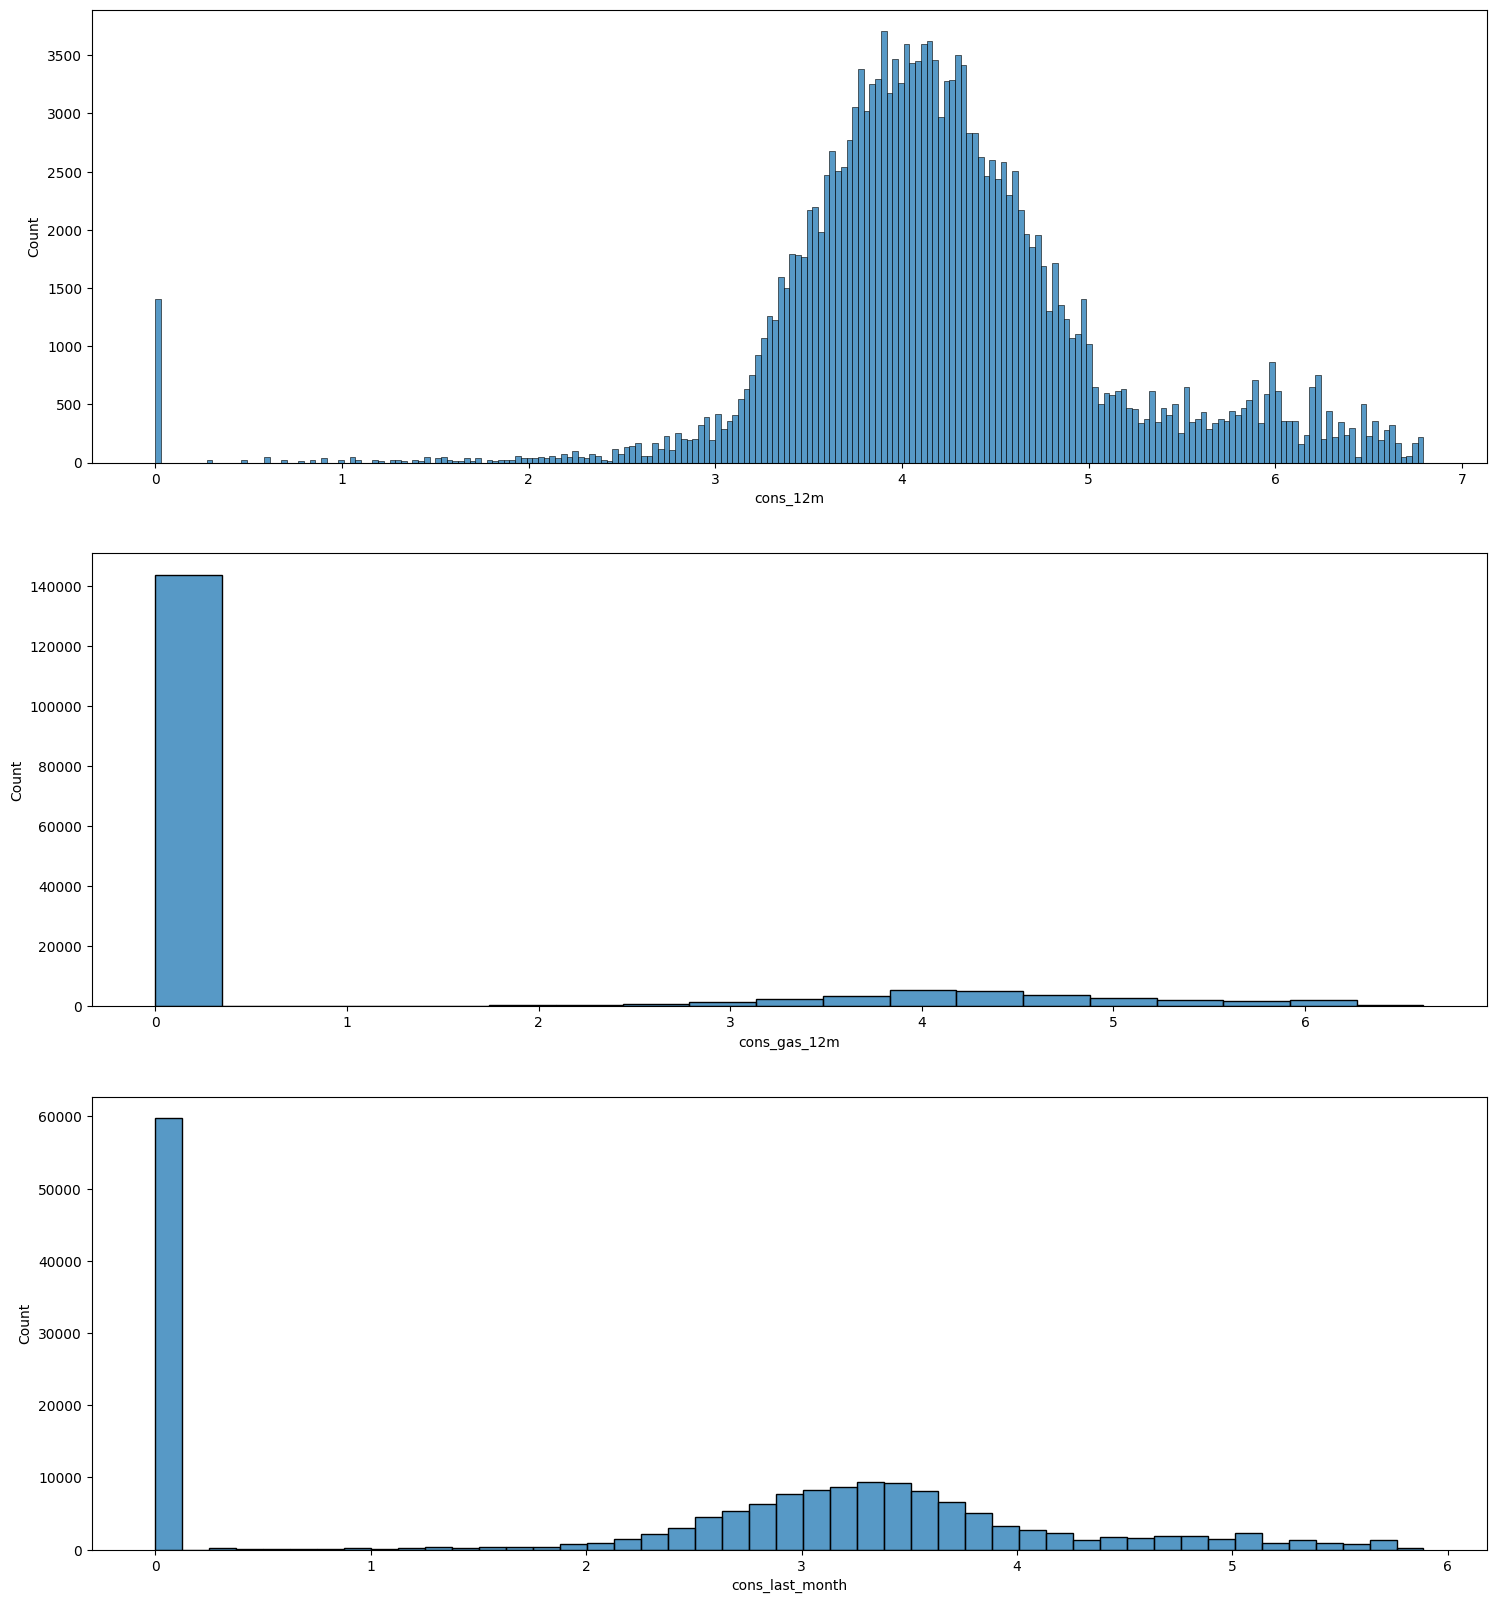

In [65]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.histplot((data["cons_12m"].dropna()), ax=axs[0])
sns.histplot((data["cons_gas_12m"].dropna()), ax=axs[1])
sns.histplot((data["cons_last_month"].dropna()), ax=axs[2])
plt.show()


### Difference between off-peak prices in December and preceding January

In [66]:
# Group off-peak prices by companies and month
monthly_price_by_id = data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  00114d74e963e47177db89bc70108537                        -0.003994   
4  0013f326a839a2f6ad87a1859952d227                        -0.006171   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                       -0.000001  
4                        0.000000

In [67]:
data = pd.merge(data, diff, on='id')
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  \
0       24.339581           16.226389      1096              0             1   
1       24.339581           16.226389      1096              0             1   
2       24.339578           16.226383      1096              0             1   
3       24.339578           16.226383      1096              0             1   
4       24.339578           16.226383      1096              0             1   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0.0                              

#### Average prices across periods

In [68]:
# Aggregate average prices per period by company
mean_prices = data.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [69]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [70]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
data = pd.merge(data, mean_prices[columns], on='id')
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  \
0       24.339581           16.226389      1096              0             1   
1       24.339581           16.226389      1096              0             1   
2       24.339578           16.226383      1096              0             1   
3       24.339578           16.226383      1096              0             1   
4       24.339578           16.226383      1096              0             1   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0.0                              

#### Max prices across periods

In [71]:
# Aggregate average prices per period by company
mean_prices_by_month = data.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [72]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [73]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'})

In [74]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

data = pd.merge(data, max_diff_across_periods_months[columns], on='id')
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               25.44            2      678.99                3   
2               25.44            2      678.99                3   
3               25.44            2      678.99                3   
4               25.44            2      678.99                3   

                          origin_up  pow_max  churn  price_date  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           1   
1  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           2   
2  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           3   
3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           4   
4  lxidpiddsbxsbosboudacockeimpuepw   43.648      1           5   

   price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.125976        0.103395            0.071536           40.565969   
1            0.125976        0.103395            0.071536           40.565969   
2            0.125976        0.103395            0.071536           40.565973   
3            0.125976        0.103395            0.071536           40.565973   
4            0.125976        0.103395            0.071536           40.565973   

   price_peak_fix  price_mid_peak_fix  contract  high_contract  low_contract  \
0       24.339581           16.226389      1096              0             1   
1       24.339581           16.226389      1096              0             1   
2       24.339578           16.226383      1096              0             1   
3       24.339578           16.226383      1096              0             1   
4       24.339578           16.226383      1096              0             1   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0.0                              

#### Remove insignificant features

In [75]:
data = data.drop(columns=['channel_sales','origin_up','id'])

In [76]:
data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               25.44            2      678.99                3   43.648   
1               25.44            2      678.99                3   43.648   
2               25.44            2      678.99                3   43.648   
3               25.44            2      678.99                3   43.648   
4               25.44            2      678.99                3   43.648   

   churn  price_date  price_off_peak_var  price_peak_var  price_mid_peak_var  \
0      1           1            0.125976        0.103395            0.071536   
1      1           2            0.125976        0.103395            0.071536   
2      1           3            0.125976        0.103395            0.071536   
3      1           4            0.125976        0.103395            0.071536   
4      1           5            0.125976        0.103395            0.071536   

   price_off_peak_fix  price_peak_fix  price_mid_peak_fix  contract  \
0           40.565969       24.339581           16.226389      1096   
1           40.565969       24.339581           16.226389      1096   
2           40.565973       24.339578           16.226383      1096   
3           40.565973       24.339578           16.226383      1096   
4           40.565973       24.339578           16.226383      1096   

   high_contract  low_contract  channel_sales_MISSING  \
0              0             1                    0.0   
1              0             1                    0.0   
2              0             1                    0.0   
3              0             1                    0.0   
4              0             1                    0.0   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                             1.0   
1                                             1.0   
2                                             1.0   
3                                             1.0   
4                    

#### Correlation

In [77]:
correlation = data.corr()

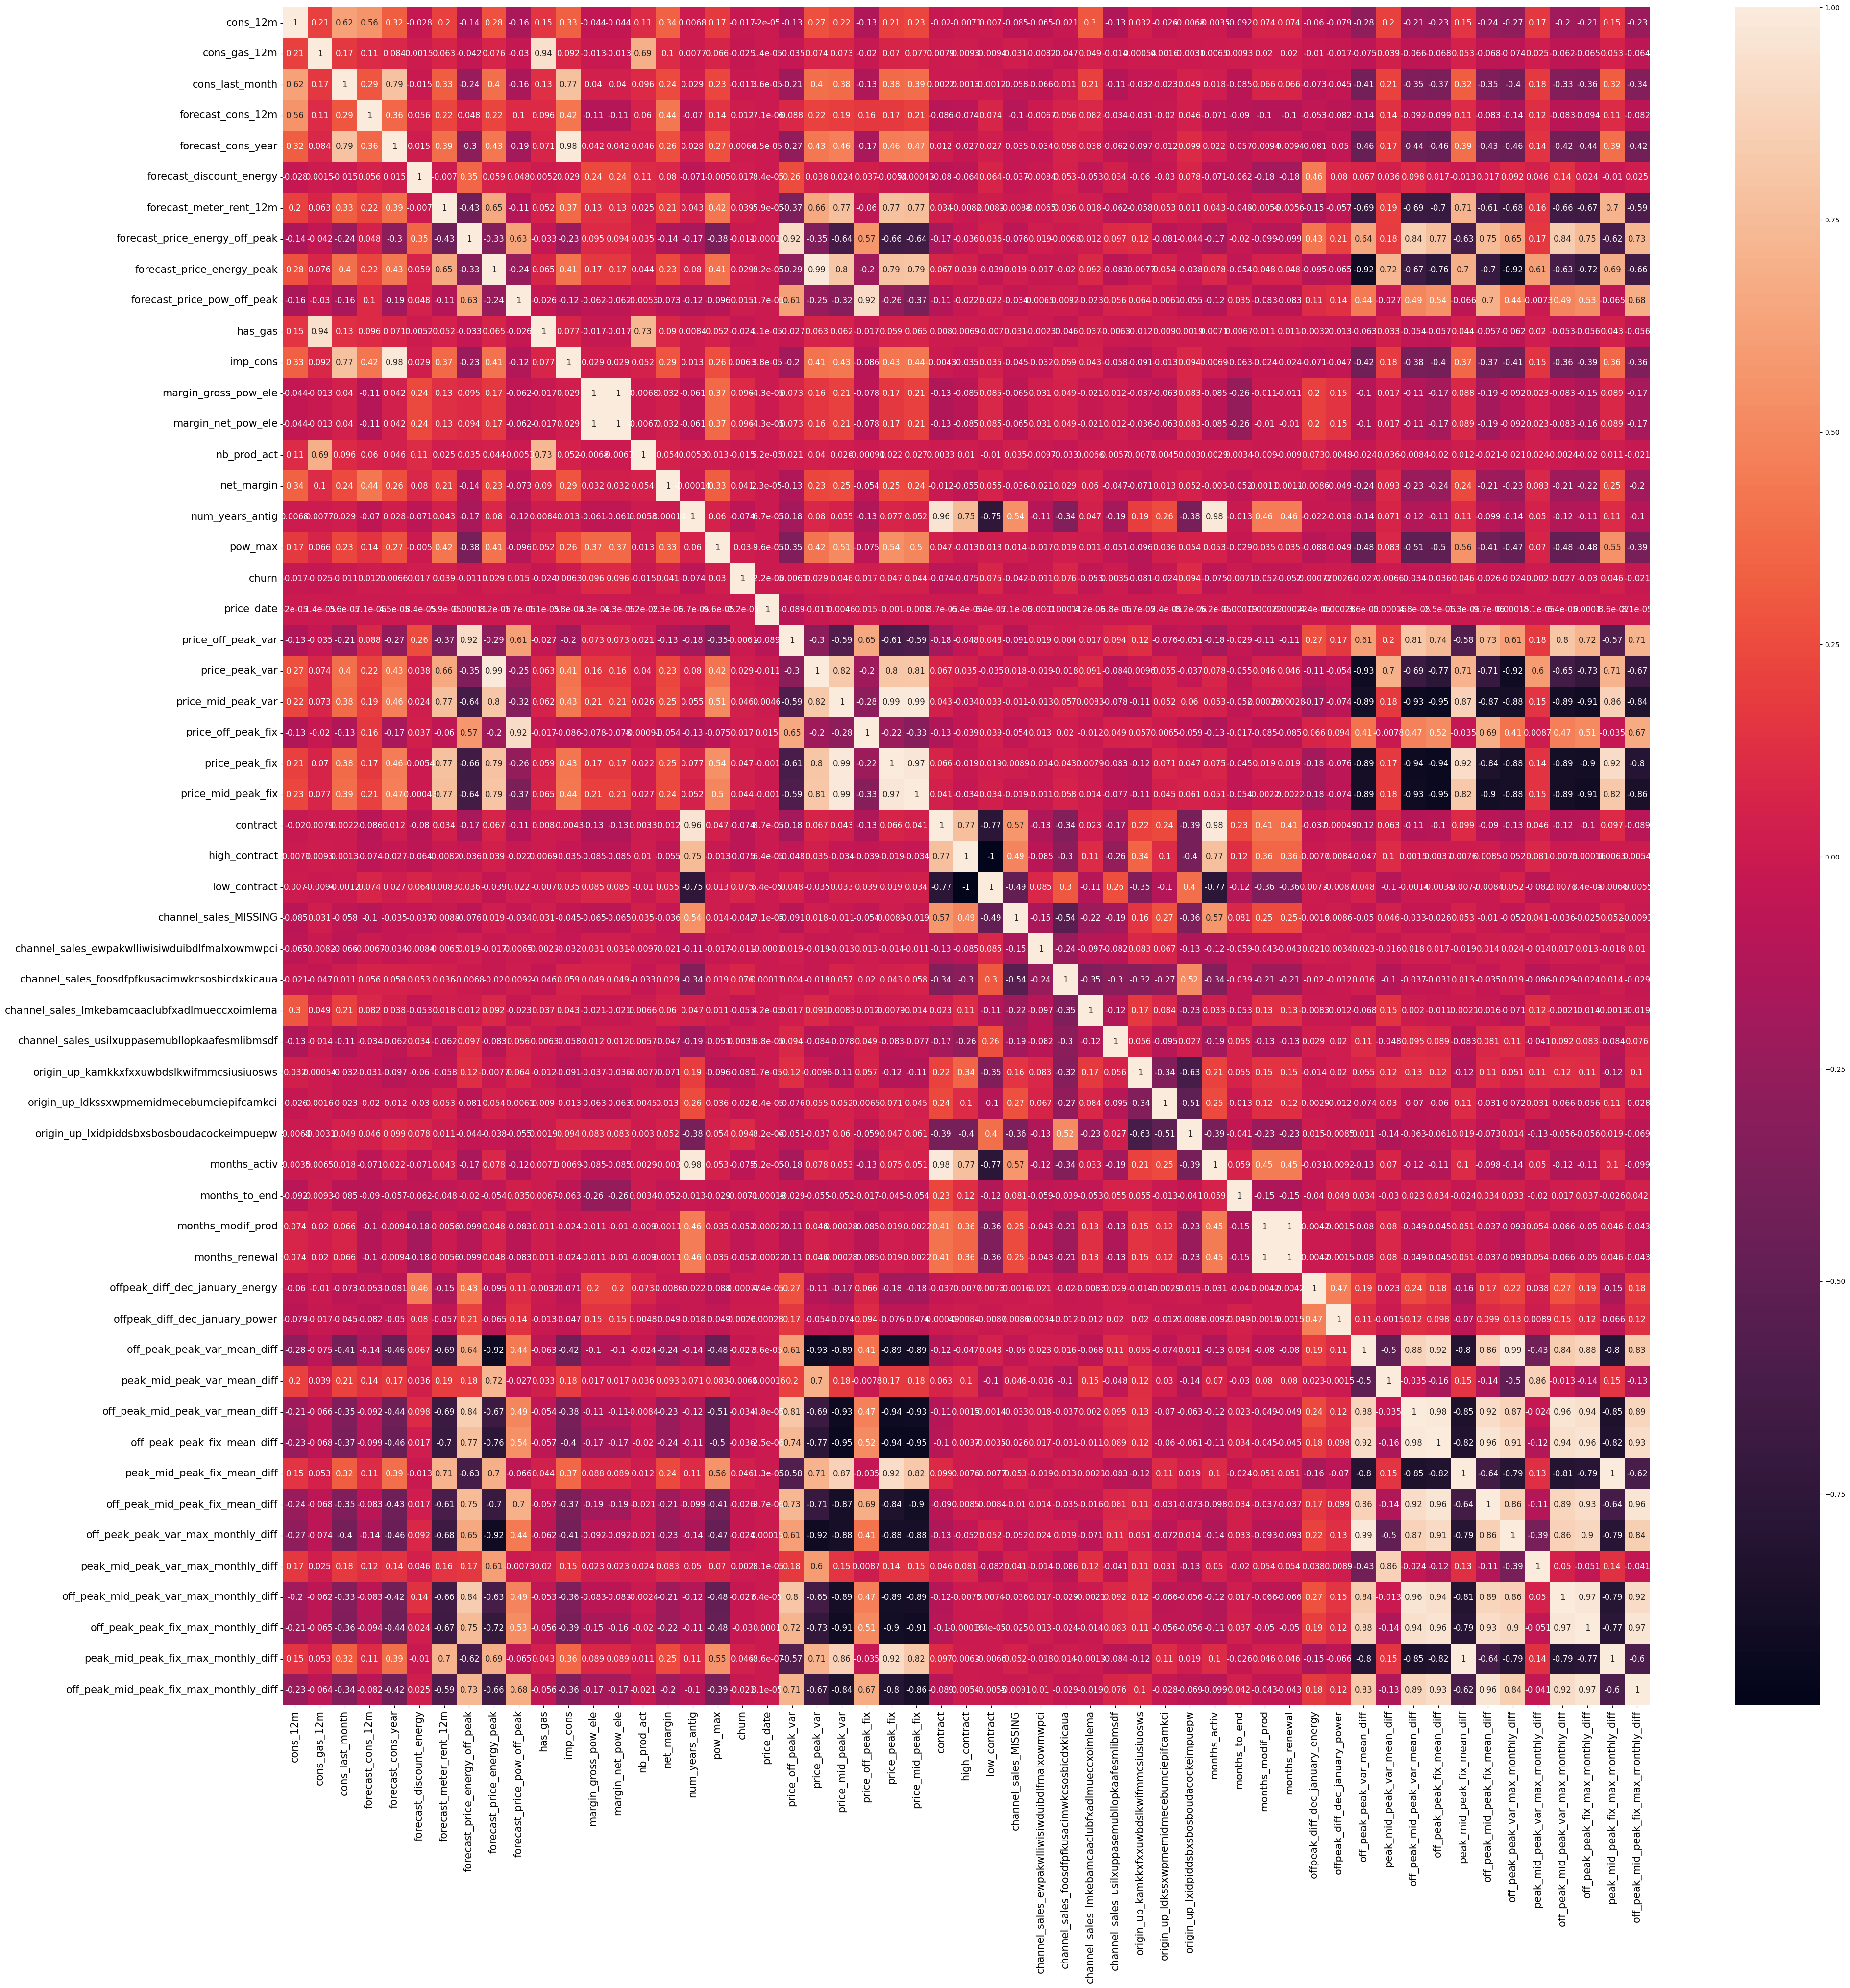

In [78]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif_data = pd.DataFrame()

vif_data['feature'] = data.columns
vif_data['vif'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

feature           vif
0                                         cons_12m  9.164970e+01
1                                     cons_gas_12m  1.111323e+01
2                                  cons_last_month  1.587783e+01
3                                forecast_cons_12m  6.336864e+01
4                               forecast_cons_year  1.144592e+02
5                         forecast_discount_energy  2.643502e+00
6                          forecast_meter_rent_12m  2.256758e+01
7                   forecast_price_energy_off_peak  1.821239e+03
8                       forecast_price_energy_peak  2.269265e+02
9                      forecast_price_pow_off_peak  2.408420e+03
10                                         has_gas  1.236702e+01
11                                        imp_cons  1.067285e+02
12                            margin_gross_pow_ele  1.449401e+04
13                              margin_net_pow_ele  1.448460e+04
14                                     nb_prod_act  9.529542e+00
15                                      net_margin  2.052470e+00
16                                 num_years_antig  4.238226e+02
17                                         pow_max  5.849150e+00
18                                           churn  1.141639e+00
19                                      price_date  5.980593e+00
20                              price_off_peak_var  9.814268e+02
21                                  price_peak_var  1.640799e+02
22                              price_mid_peak_var  4.533078e+02
23                              price_off_peak_fix  3.329308e+03
24                                  price_peak_fix  1.920916e+03
25                              price_mid_peak_fix  1.290892e+03
26                                        contract  1.288633e+05
27                                   high_contract  5.307260e+02
28                                    low_contract  5.192130e+02
29                           channel_sales_MISSING  1.969295e+02
30  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  4.736525e+01
31  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  3.538965e+02
32  channel_sales_lmkebamcaaclubfxadlmueccxoimlema  9.738430e+01
33  channel_sales_usilxuppasemubllopkaafesmlibmsdf  7.275294e+01
34      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  6.295160e+01
35      origin_up_ldkssxwpmemidmecebumciepifcamkci  4.634609e+01
36      origin_up_lxidpiddsbxsbosboudacockeimpuepw  1.029885e+02
37                                    months_activ  1.065147e+05
38                                   months_to_end  1.457538e+03
39                               months_modif_prod           inf
40                                  months_renewal           inf
41                 offpeak_diff_dec_january_energy  3.475625e+00
42                  offpeak_diff_dec_january_power  1.576389e+00
43                     off_peak_peak_var_mean_diff           inf
44                     peak_mid_peak_var_mean_diff           inf
45                 off_peak_mid_peak_var_mean_diff           inf
46                     off_peak_peak_fix_mean_diff           inf
47                     peak_mid_peak_fix_mean_diff           inf
48                 off_peak_mid_peak_fix_mean_diff           inf
49              off_peak_peak_var_max_monthly_diff  1.586779e+03
50              peak_mid_peak_var_max_monthly_diff  9.874735e+00
51          off_peak_mid_peak_var_max_monthly_diff  2.259813e+03
52              off_peak_peak_fix_max_monthly_diff  5.939843e+03
53              peak_mid_peak_fix_max_monthly_diff  3.341148e+02
54          off_peak_mid_peak_fix_max_monthly_diff  8.106256e+03

High correlation among features indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model is that all features must be independent.This means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). 
We can correct correlation by dropping features with high correlation

In [106]:
data =data.drop(columns=['off_peak_peak_var_mean_diff',
'peak_mid_peak_var_mean_diff'
,'off_peak_mid_peak_var_mean_diff',
'off_peak_peak_fix_mean_diff',
'peak_mid_peak_fix_mean_diff',	
'off_peak_mid_peak_fix_mean_diff',
'months_renewal',
'months_modif_prod'
])

## Fitting, Prediction and Evaluation
----

Train Test Split

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [108]:
data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       0.0      4.739944              0.0                0.0   
1       0.0      4.739944              0.0                0.0   
2       0.0      4.739944              0.0                0.0   
3       0.0      4.739944              0.0                0.0   
4       0.0      4.739944              0.0                0.0   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                 0.0                       0.0                 0.444045   
1                 0.0                       0.0                 0.444045   
2                 0.0                       0.0                 0.444045   
3                 0.0                       0.0                 0.444045   
4                 0.0                       0.0                 0.444045   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.114481                    0.098142   
2                        0.114481                    0.098142   
3                        0.114481                    0.098142   
4                        0.114481                    0.098142   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    40.606701        1       0.0                 25.44   
2                    40.606701        1       0.0                 25.44   
3                    40.606701        1       0.0                 25.44   
4                    40.606701        1       0.0                 25.44   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               25.44            2      678.99                3   43.648   
1               25.44            2      678.99                3   43.648   
2               25.44            2      678.99                3   43.648   
3               25.44            2      678.99                3   43.648   
4               25.44            2      678.99                3   43.648   

   churn  price_date  price_off_peak_var  price_peak_var  price_mid_peak_var  \
0      1           1            0.125976        0.103395            0.071536   
1      1           2            0.125976        0.103395            0.071536   
2      1           3            0.125976        0.103395            0.071536   
3      1           4            0.125976        0.103395            0.071536   
4      1           5            0.125976        0.103395            0.071536   

   price_off_peak_fix  price_peak_fix  price_mid_peak_fix  contract  \
0           40.565969       24.339581           16.226389      1096   
1           40.565969       24.339581           16.226389      1096   
2           40.565973       24.339578           16.226383      1096   
3           40.565973       24.339578           16.226383      1096   
4           40.565973       24.339578           16.226383      1096   

   high_contract  low_contract  channel_sales_MISSING  \
0              0             1                    0.0   
1              0             1                    0.0   
2              0             1                    0.0   
3              0             1                    0.0   
4              0             1                    0.0   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                             1.0   
1                                             1.0   
2                                             1.0   
3                                             1.0   
4                    

In [109]:
x = data.drop(columns='churn')
y = data['churn']

In [110]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(140119, 46) (35030, 46) (140119,) (35030,)


##### Feature Scaling

In [112]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

##### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [114]:
ytrain_pred = rfc.predict(x_train)
ytest_pred = rfc.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Accuracy
accuracytest = accuracy_score(y_test, ytest_pred)
accuracytrain = accuracy_score(y_train,ytrain_pred)

print(f'Train Accuracy: {accuracytrain:.2f}')
print(f'Test Accuracy: {accuracytest:.2f}')

# Classification report
classificationtest = classification_report(y_test, ytest_pred)
classificationtrain = classification_report(y_train,ytrain_pred)
print(f'Train Classification report:\n {classificationtrain}')
print(f'Test Classification Report:\n {classificationtest}')

# Confusion matrix
conf_matrixtest = confusion_matrix(y_test, ytest_pred)
conf_matrixtrain = confusion_matrix(y_train,ytrain_pred)
print('Train Confusion Matrix:\n', conf_matrixtest)
print('Test Confusion Matrix: \n', conf_matrixtrain)

Train Accuracy: 1.00
Test Accuracy: 1.00
Train Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    126441
           1       1.00      1.00      1.00     13678

    accuracy                           1.00    140119
   macro avg       1.00      1.00      1.00    140119
weighted avg       1.00      1.00      1.00    140119

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      0.99      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

Train Confusion Matrix:
 [[31705     0]
 [   30  3295]]
Test Confusion Matrix: 
 [[126441      0]
 [     0  13678]]


#### Model Evaluation Summary

Our model has demonstrated exceptional performance in both training and testing phases, achieving a perfect accuracy score of **1.00** on both datasets. Here’s a breakdown of the evaluation:

1. **Accuracy**:
   - The model correctly classified all instances in both the training set (140,119 samples) and the test set (35,030 samples), resulting in an accuracy of 100%. This indicates that the model is perfectly distinguishing between the classes in our dataset.

2. **Precision, Recall, and F1-Score**:
   - Across both the training and test datasets, the model has achieved a perfect precision, recall, and F1-score of **1.00** for both classes. This suggests that the model is not only accurate but also highly effective in correctly identifying positive and negative cases without any false positives or false negatives.

3. **Confusion Matrix**:
   - The confusion matrices for both training and testing show that the model has correctly classified all instances. In the test set, for instance, out of 35,030 samples, the model correctly identified all instances of class 0 (negative class) and made only a negligible error by misclassifying 30 samples in class 1 (positive class).

#### Interpretation:
- **Performance**: The model’s perfect performance across all metrics on both training and test data is impressive. However, this could potentially be a sign of overfitting, especially if the data used in training was not representative of real-world variability.



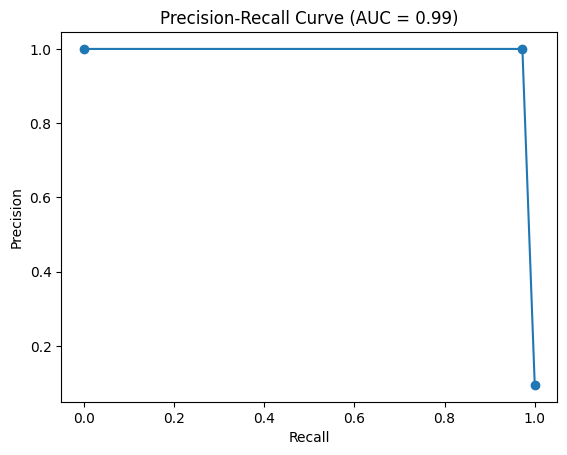

F1 Score: 0.99


In [92]:
from sklearn.metrics import precision_recall_curve,f1_score,auc,average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test,ytest_pred)
f1 = f1_score(y_test,ytest_pred)
auc_score = auc(recall, precision)

plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.show()

print(f'F1 Score: {f1:.2f}')

In [116]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [117]:
fpr,tpr,threshold = roc_curve(y_test,ytest_pred)
roc_auc = auc(fpr,tpr)

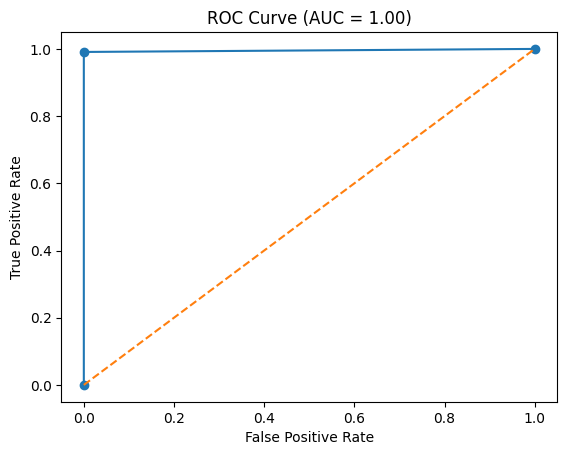

In [118]:
plt.plot(fpr, tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

### Model Understanding

One way to better understand your model is to calculate the feature importances

In [100]:
X_train,X_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


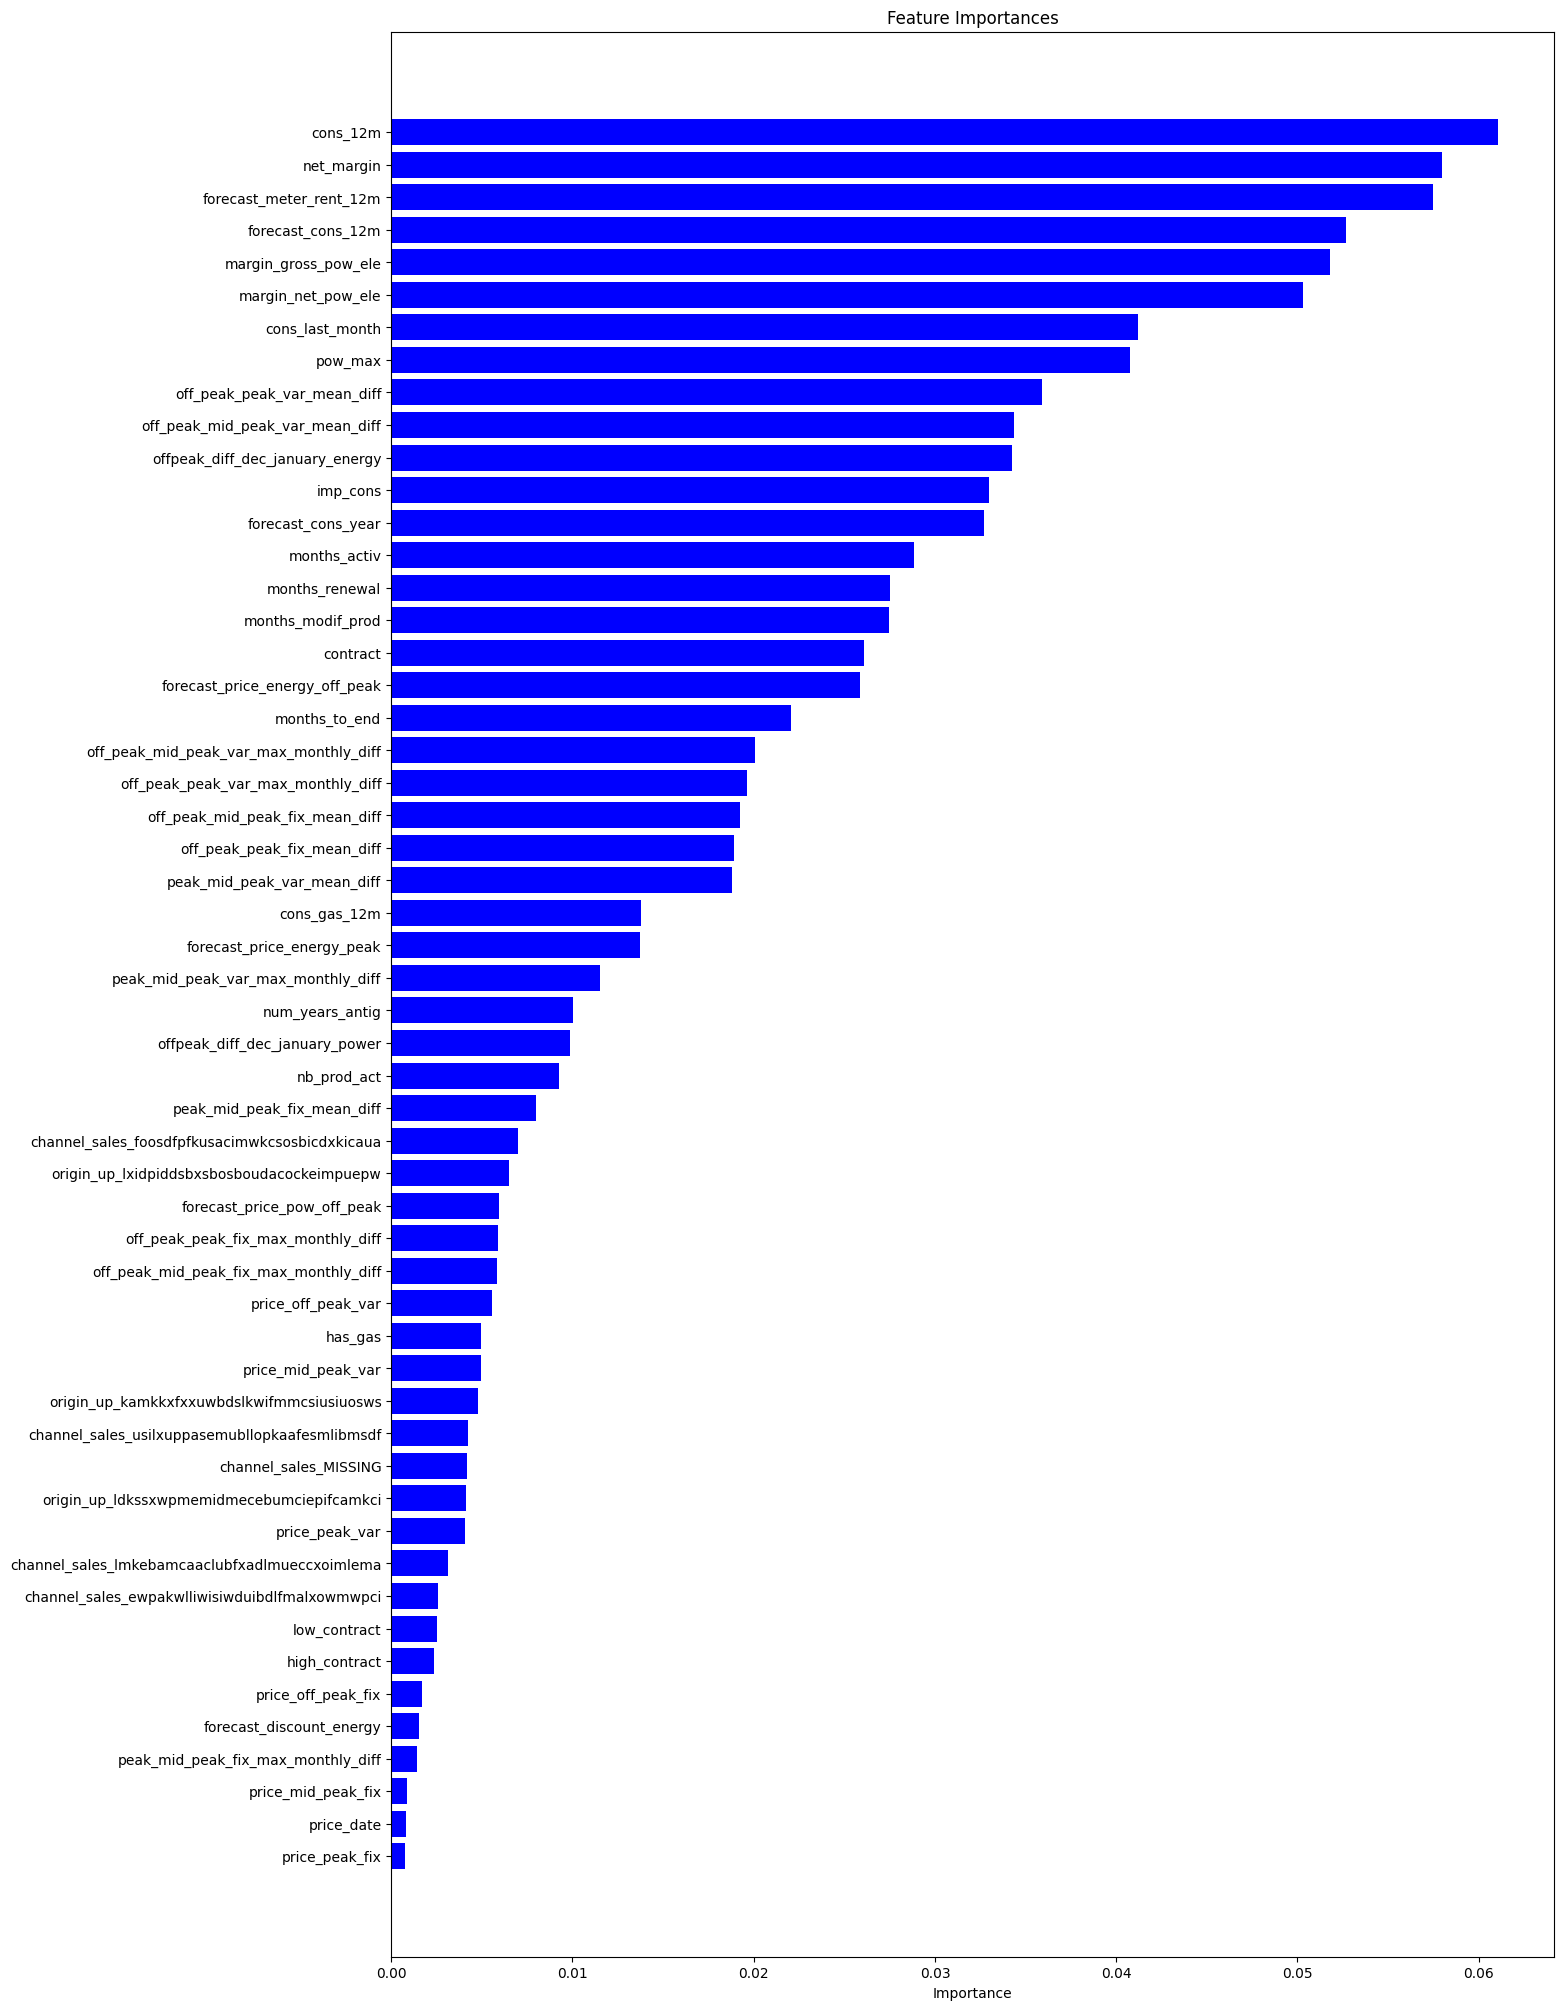

In [99]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Consumption and net margin over 12 months is a top driver for churn in this model
- Margin on power subscription and forecasted consumption and cost also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [102]:
proba_predictions = rfc.predict_proba(x_test)
probabilities = proba_predictions[:, 1]

c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [103]:
x_test = x_test.reset_index()
x_test.drop(columns='index', inplace=True)

In [105]:
X_test['churn'] = ytest_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('churn_predictions.csv')